# Probability

In [8]:
import enum, random
# An Enum is a type set of enumerated values. We can use them
# to make our code more descrptive and readable

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

   # print("P(both | older):", both_girls / older_girl)
   # print("P(both | either):", both_girls / either_girl)

## Continuous Distributions

In [9]:
def uniform_pdf1(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

def uniform_pdf2(x:float) -> float:
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

### The Normal Distribution

 $$ f(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

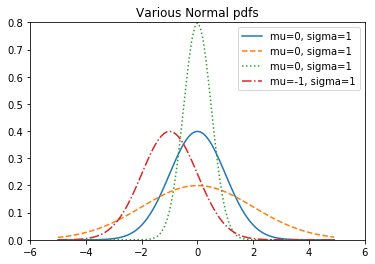

In [15]:
import math
import matplotlib.pyplot as plt
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x:float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu)**2/2/sigma**2)/(SQRT_TWO_PI*sigma))

xs = [ x / 10.0 for x in range(-50,50) ]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs],'-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs],'--', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs],':', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs],'-.', label='mu=-1, sigma=1')
plt.axis([-6,6,0,0.8])
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

Cuando $\mu=0$ y $\sigma=1$ esta se llama **Distribucion estandar normal**. Si $z$ es una variable aleatoria normal estándar, entonces la ecuacion se vuelve:
$$X = \sigma Z + \mu$$
Tambien es normal pero con promedio $\mu$ y desviacion estardar $\sigma$. A la inversa, si X is una variable aleatoria normal con promedio $\mu$ y desviacion estandar $\sigma$
$$ Z = \frac{(X - \mu)}{\sigma} $$
es una varible normal variable

In [18]:
def normal_cdf(x:float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x-mu)/math.sqrt(2)/sigma)) /2

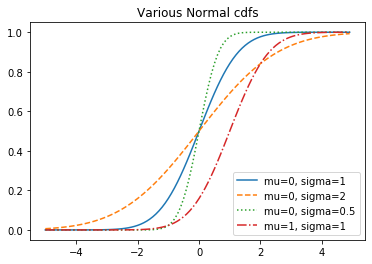

In [19]:
xs = [ x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=1) for x in xs], '-.', label='mu=1, sigma=1')
plt.legend(loc=4) # Bottom right
plt.title('Various Normal cdfs')
plt.show()

In [20]:
def inverse_normal_cdf(p:float,
                   mu: float = 0,
                   sigma: float = 1, 
                   tolerance: float = 0.00001) -> float:
    """ Buscar aproximadamente la inversa usando busqueda binaria """
    # If not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p=tolerance)
    low_z = -10.0 # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0 # normal_cdf(-10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_z

## The Central Limit Theorem
Una de las razones por las cuales la distribucion normal es tan util es por el **teorema del limite central**, el que dice que, en esencia, que un varible aleatoria se define como el promedio de un numero largo
$$ \frac{1}{n} (x_1 + \dots + x_n) $$
En particular, si $x_1, \dots, x_n$ son variables aleatorias con promedio $\mu$ y desviacion estandar $\sigma$, and si $n$ es largo, entoces:

$$ \frac{(x_1 + \dots + x_n) - \mu n}{\sigma \sqrt{n}} $$

In [22]:
def bernoulli_trial(p: float) -> int:
    """ Retorna 1 con probabilidad p y 0 con probalidad 1- p """
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))

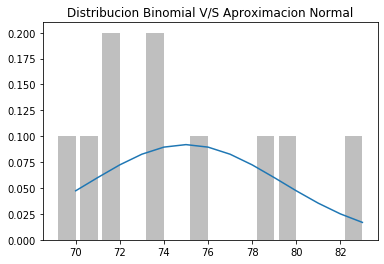

In [31]:
from collections import Counter

def histograma_binominal(p: float, n: int, num_points: int) -> None:
    """ Toma los puntos desde un Binomial(n,p) y grafica sus histogramas """
    data = [binomial(n, p) for _ in range(num_points)]
    
    # Use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v/num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))

    # Use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i-0.5, mu ,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Distribucion Binomial V/S Aproximacion Normal")

histograma_binominal(0.75, 100, 10)

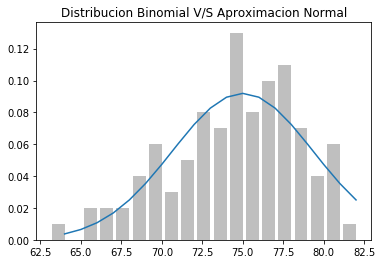

In [34]:
histograma_binominal(0.75, 100, 100)

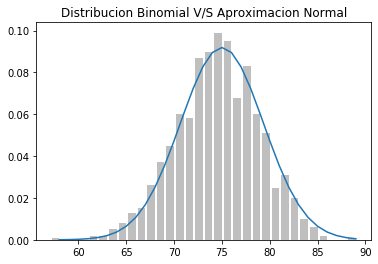

In [36]:
histograma_binominal(0.75, 100, 1000)

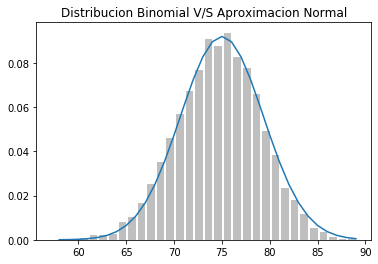

In [37]:
histograma_binominal(0.75, 100, 10000)

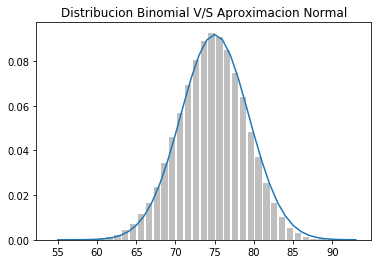

In [39]:
histograma_binominal(0.75, 100, 100000)